In [1]:
1.교차 검증의 필요성과 절차 및 기법에 대해 살표본다.
2.검증 곡선과 학습 곡선의 특징을 이해한다.
3.최적의 모델을 찾기 위한 그리드 서치 사용법을 익힌다.
4.특징 공학을 이용한 특징 변환 기법을 살펴본다.

SyntaxError: invalid syntax (<ipython-input-1-eac2fc2c7b84>, line 1)

In [2]:
1.교차 검증의 필요성과 절차 및 기법에 대해 살표본다.
    교차검증의 기본 절차 :
        - 교차검증 1단계에서 데이터를 학습용과 테스트용으로 나눔
        - 모델의 테스트 성능을 기록
        - 교차검증의 매 단계마다 다른 파티션으로 위의 작업을 수행
        - 모델의 최종 성능은 매 단계의 테스트 성능을 평균 계산
    교차 검증은 모델의 변동성을 줄여주면 오버피팅을 막아 준다.

SyntaxError: invalid syntax (<ipython-input-2-7015089f262d>, line 1)

In [3]:
★K폴드 교차 검증:
    데이터를 무작위로 k개의 동일한 크기인 폴드로 나눔.(보통 k값으로 3,5,10을 많이 사용)
    각 시행 단계에서 특정 폴트를 테스트용으로, 나머지는 학습용으로 사용 각 폴드를 테스트 세트로
    한번씩 사용하고 이과정을 k번 반복 시행함, 최종적으로 모델 성능의 평균을 계산.

SyntaxError: invalid syntax (<ipython-input-3-a51026feb268>, line 1)

In [8]:
# 번처 데이터 불러오기
from sklearn.datasets import load_iris
# K최근접 이웃 알고리즘.
from sklearn.neighbors import KNeighborsClassifier
# 교차 검증 함수.
from sklearn.model_selection import cross_val_score

# 번처 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

#최근접 이웃 하나를 가지고 거리 계산(분류)
model = KNeighborsClassifier(n_neighbors = 1)

# 반복 후 성능에 대한 정보 확인, (모델, 특징행렬, 대상벡터 , k값 5번 반복)
cross_val_score(model, X, y, cv=5)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [9]:
★단일 관측치 제거 방식(LOOCV)
    Leave-one-out cross validation
    매 시행 단계에서 테스트 샘플을 고정하는 방식, 데이터를 n개의 서브세트로 분할하고, n개중 1개 테스트용으로 두고 n-1개로 학습수행
    데이터 크기가 n이면 n번의 교차 검증을 수행.

SyntaxError: invalid character in identifier (<ipython-input-9-79b1dce9a91d>, line 1)

In [15]:
# 데이터 표면 150개, 교차검증 150회, 1은 성공, 0은 실패
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores, scores.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 0.96)

In [ ]:
3.최적의 모델
 모델의 성능이 기대에 못 미칠 경우 어떻게 개선할 것인가?
    더 복잡하거나 더 유연한 모델을 사용
    덜 복잡하거나 덜 유연한 모델을 사용
    더 많은 훈련 표본을 수집
    각 표본에 특징을 추가하기 위해 더 많은 테이터를 수집

In [ ]:
★편향-분산 트레이드오프 - 고편향 모델과 고분산 모델
 언더피트 : 과소적합, 모델이 고편향됨. 모델이 모든 특징을 적절히 설명하 수 있을 만큼 모델 유연성이 충분치 않음.
            과소적합(언더피트) => 데이터의 분산에 비해 모델(1차회귀선) 유연성이 떨어진다.
            고분산(오버피트)   => 데이터의 분산에 비해 모델(n차회귀선) 과도하게 적합되어 있다.

In [18]:
# PolynomialFeatures(차수), 모델 복잡도를 조절하기 위한 코드 작업 수행.
from sklearn.preprocessing import PolynomialFeatures
# LinearRegression(회귀), 선형 모델 만들기
from sklearn.linear_model import LinearRegression
# make_pipeline(), 에 등록 하면 객체들이 심리스(seamless)하게 수행이 되기 때문에 생산성 높아짐.
from sklearn.pipeline import make_pipeline

import numpy as np

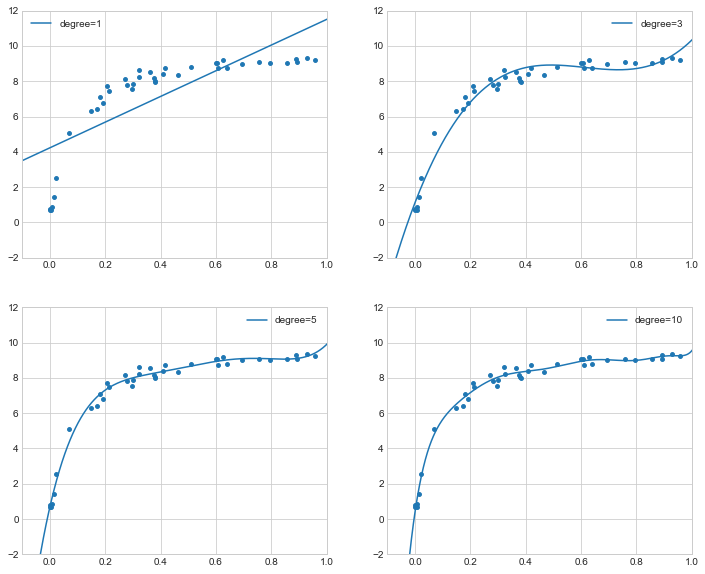

In [26]:
np.random.seed(0)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.rand(40)

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn-whitegrid")

# -01. ~ 1 사이값 500개를 만들고 1행 1열로 만들어라.
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))

# i=인덱스, 시작=1 , degree = 1, 3, 5, 10차 degree정보 생성.
for i, degree in enumerate([1, 3, 5, 10], start=1):
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s= 15)
    # PolynomialFeatures(degree=1,3,5,10)이 들어온단 선형모델을 비선형구조로 바꾼다.
    # pipeline앞단에서 피처 엔지니어링 작업(차수조정) -> 선형회귀 인스턴스를 만든다.
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test)
    # plot를 그릴때 테스트 y_test(예측값)을 가지고 라인 그래프를 그린다.
    ax.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best')
    
#  degree가 높아 질수록, 복잡도가 높아지면, 노이즈가 발생할 수 있어 성능에 대한 판단이 필요함.
# 1번 그래프는 너무 단순하고(언더피트), 4번 그래프는 너무 복잡함(오버피트.

In [ ]:
# 편향-분산 트레이드오프
 - 편향과 분산 사이의 트레이드오프에서 가장 효율적인 지점 => 최적의 모델.
 - 검증 곡선을 꼭 그려봐야 한다.

(-0.054906456675539755,
 1.0129533730303812,
 0.24787502562337005,
 9.78465026204953)

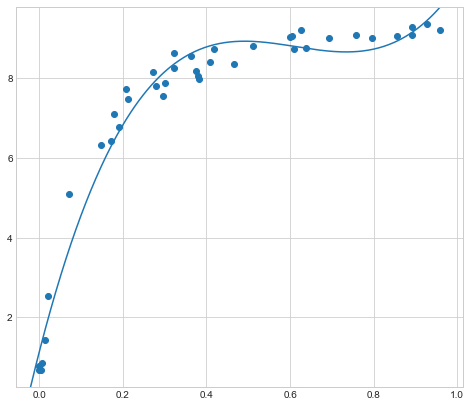

In [42]:
plt.figure(figsize=(8,7))
# scatter=산포그래프,   X.ravel() = X2차원배열을 1차원 vector로 바꾸어준다.
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [44]:
# 학습 곡선
 - 최적의 모델은 훈련 데이터의 규모에도 의존함.
 - 데이터 규모에 따른 변화를 확인할 수 있는 학습 곡선
 - 학습곡선 : 훈련집합의 크기에 따른 훈련 점수/검증 점수의 플롯
 - 트레이닝 스코어와 검증 곡선이 수렴한다는 것은 데이터 규모가 커져도 개선의 효과를 보이지 않는 지점이라는 의미
   => 이럴때는 더 복잡한 모델로 변경해본다.

IndentationError: unexpected indent (<ipython-input-44-e0e610eaca20>, line 2)

In [45]:
# 그리드 서치
유듀브 :  https://www.youtube.com/watch?v=4FGDcIMcUZo&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=31
 - 최적의 다항식 모델을 구하기 위한 GridSearchCV
 - 그리드 서치는 검증 점수를 최대화 하는 모델을 찾아 낸느 자동화 도구.
 - GridSearchCV 클래스 사용.

IndentationError: unexpected indent (<ipython-input-45-9152faca3118>, line 2)

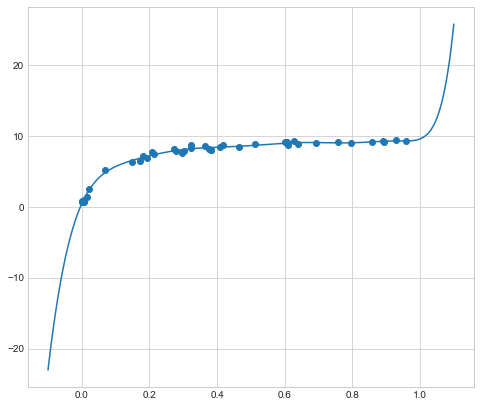

In [34]:
plt.figure(figsize=(8,7))
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)

In [ ]:
fro